# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Miftahul Labiib Syam
- **Email:** m208d4ky2914@bangkit.academy
- **ID Dicoding:** 

## Business Questions

- How does the daily bike rental count (cnt) correlate with temperature, humidity, and wind speed?
- At what time does the highest peak of bike rentals occur, and why does it happen?
- What are the differences in rental patterns between weekdays, weekends, and holidays?

## Import Semua Packages/Library yang Digunakan

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Before delving into our analysis, it's crucial to ensure that we have the necessary data loaded into our notebook. We'll be utilizing two datasets: `day.csv` and `hour.csv`. These datasets contain valuable information that will enable us to explore various aspects of bike rental patterns comprehensively.

To load these datasets, we'll employ the `read_csv()` method provided by the pandas library. By leveraging this method, we can seamlessly import our data into the notebook environment, facilitating further exploration and analysis. Let's proceed by loading the datasets and preparing them for our analysis journey.

In [37]:
bike_day = pd.read_csv('Bike-sharing-dataset/day.csv')
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
bike_hour = pd.read_csv('Bike-sharing-dataset/hour.csv')
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

Once we've successfully loaded our data into the notebook, our next step involves understanding its structure and characteristics. To accomplish this, we'll employ a method called `info()`, provided by pandas. This method allows us to gain insights into the data types of each column, as well as the presence of any missing values. By examining the data types, we can determine whether any adjustments are necessary, such as converting certain columns to different data types to facilitate our analysis. Let's proceed by accessing the information about our datasets using the `info()` method. This will provide us with valuable insights that will guide us in preparing the data for our analysis.

In [39]:
bike_day.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Based on the information above, there are several column that we need to convert such as `dteday`, `season`,  `holiday`,and `workingday`. 

In [40]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


This is the same with `bike_day` data above.

### Cleaning Data

In this section, we will do some data cleaning including change the daya type and also converting some value in the dataset to make it more readable.

In [41]:
bike_day['dteday'] = bike_day['dteday'].astype('datetime64[ns]')
bike_day[['season', 'holiday', 'workingday', 'weathersit']] = bike_day[['season', 'holiday', 'workingday', 'weathersit']].astype('category')

We will do the same with `bike_hour`

In [42]:
bike_hour['dteday'] = bike_hour['dteday'].astype('datetime64[ns]')
bike_hour[['season', 'holiday', 'workingday', 'weathersit']] = bike_hour[['season', 'holiday', 'workingday', 'weathersit']].astype('category')

Let's see if there are some duplicated data in both datasets

In [43]:
bike_day.duplicated().sum()

0

In [44]:
bike_hour.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### Explore ...

Before delving into detailed analysis, it's beneficial to gain a preliminary understanding of our datasets by examining descriptive statistics. To achieve this, we'll utilize the `describe()` function, a handy tool provided by pandas. This function generates summary statistics such as count, mean, standard deviation, minimum, and maximum values for each numerical column in our datasets. By observing these statistics, we can identify any notable trends, distributions, or outliers present in the data. Let's begin by generating descriptive statistics for our datasets using the `describe()` function. This initial exploration will lay the foundation for our subsequent analyses.

In [45]:
bike_day.describe()

,instant,dteday,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


After reviewing the descriptive statistics above, it appears that our dataset is generally sound. However, upon closer inspection, we observe a potential skewness in the `casual` column, indicated by a notable difference between the median (Q2) and the mean value. To visualize this skewness more clearly, we can create a histogram of the `casual` column.

Histograms provide a visual representation of the distribution of numerical data by dividing the data into bins and displaying the frequency of observations within each bin. Let's proceed by plotting a histogram for the `casual` column to gain a clearer understanding of its distribution and identify any potential skewness. This will aid us in assessing the distribution of casual bike rentals and determining if any further analysis or transformation is necessary.

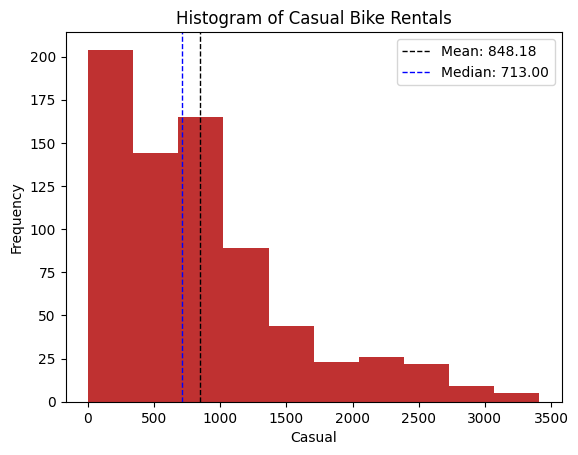

In [46]:
casual_mean = bike_day['casual'].mean()
casual_median = bike_day['casual'].median()
plt.hist(bike_day['casual'], bins = 10, color = '#BF3131')
plt.axvline(casual_mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {casual_mean:.2f}')
plt.axvline(casual_median, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {casual_median:.2f}')
plt.legend()
plt.xlabel('Casual')
plt.ylabel('Frequency')
plt.title('Histogram of Casual Bike Rentals')
plt.show()

Indeed, as depicted in the histogram, our 'casual' data exhibits a right-skewed distribution. Given that we're not currently constructing a machine learning model where assumptions about the data distribution might significantly impact model performance, we can choose to overlook this skewness for the time being.

In certain cases, when building predictive models, addressing skewness through transformations or other techniques might be necessary to ensure model robustness and accuracy. However, for our current analysis purposes, this skewness in the 'casual' data is not a critical concern.

We can proceed with our analysis while keeping in mind this observation about the distribution of casual bike rentals. If needed, we can revisit this aspect later during more advanced analyses or model-building stages.

In [47]:
bike_hour.describe()

,instant,dteday,yr,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,3.003683,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,2.005771,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


The histograms of the `casual`, `registered`, and `cnt` columns indicate that their distributions are not normal. Despite this deviation from normality, since we're not building a machine learning model or conducting inferential tests that rely heavily on normality assumptions, we can proceed with our analysis without addressing this issue. However, we should remain mindful of these non-normal distributions as they may affect certain analyses or interpretations in the future.

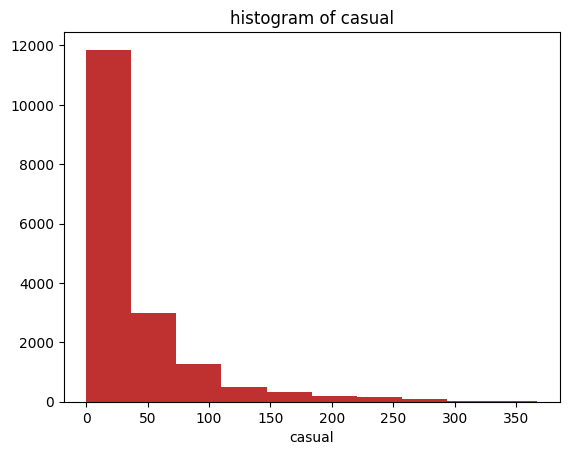

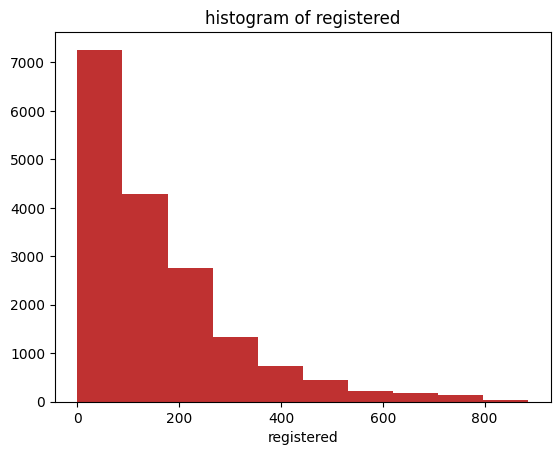

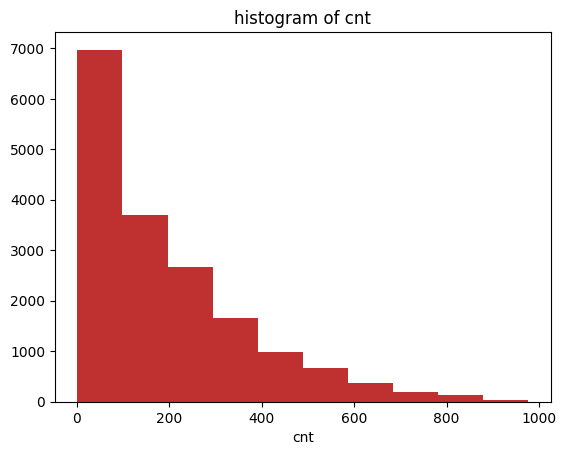

In [48]:
plotting_columns = ['casual', 'registered', 'cnt']
for column in plotting_columns:
    plt.figure()
    plt.hist(bike_hour[column], bins = 10, color = "#BF3131")
    plt.xlabel(column)
    plt.title(f'histogram of {column}')
plt.show()
    

Those plots show that our data is right-skewed

## Visualization & Explanatory Analysis

### Question 1:

*How does the daily bike rental count (cnt) correlate with temperature, humidity, and wind speed?*

<Axes: >

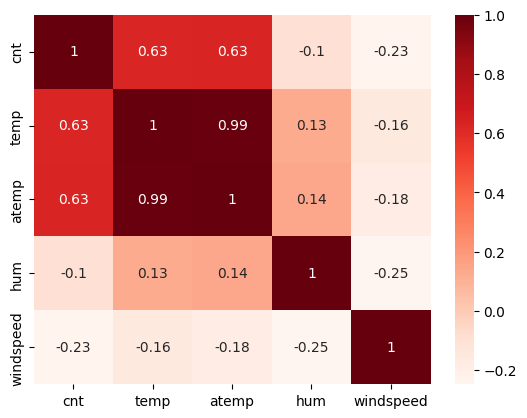

In [49]:
correlation = bike_day[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()
sns.heatmap(correlation, annot = True, cmap = 'Reds')

As depicted in the heatmap above, the most notable correlation is observed between 'atemp' and 'temp', yielding a coefficient of 0.63. This correlation suggests a positive relationship between the daily bike rental count and temperature. In other words, as the temperature rises, the number of bike rentals per day tends to increase.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


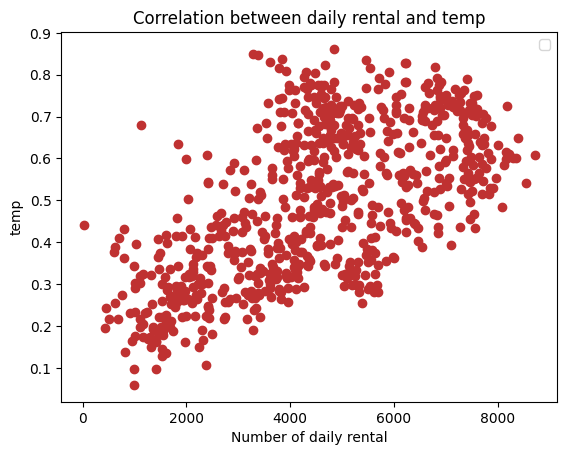

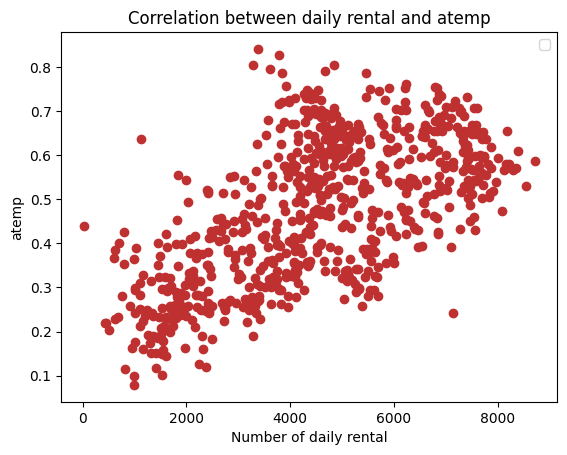

In [50]:
columns = ['temp', 'atemp']
for column in columns:
    plt.figure()
    plt.scatter(x = bike_day['cnt'], y= bike_day[column], c= "#BF3131")
    plt.xlabel('Number of daily rental')
    plt.ylabel(f'{column}')
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.title(f'Correlation between daily rental and {column}')
    plt.legend()
plt.show()

### Pertanyaan 2:

**At what time does the highest peak of bike rentals occur, and why does it happen?**

Pertama-tama kita akan membuat sebuah line chart yang menggambarkan tren total pengunjung dalam setiap jamnya.

In [51]:
hourly_tren = bike_hour.groupby(by = 'hr').agg({
    'cnt':'mean'
}).reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


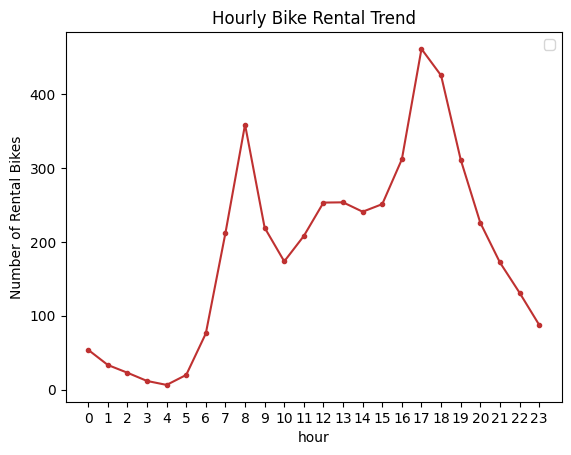

In [52]:
plt.plot(hourly_tren['hr'], hourly_tren['cnt'], marker = ".", c= "#BF3131")
plt.xticks(hourly_tren['hr'])
plt.xlabel('hour')
plt.ylabel('Number of Rental Bikes')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title("Hourly Bike Rental Trend")
plt.legend()
plt.show()

Based on the plot above, it can be seen that the highest average bike rentals occur at 5:00 PM. From here, we can further investigate the factors contributing to the high number of rentals during this hour.

Firstly, let's examine the average air temperature at that time. This is because our initial analysis indicated a significant correlation between temperature and the number of rentals.

In [53]:
hourly_temperature = bike_hour.groupby(by = 'hr').agg({
    'temp':'mean',
    'atemp':'mean'
}).reset_index()

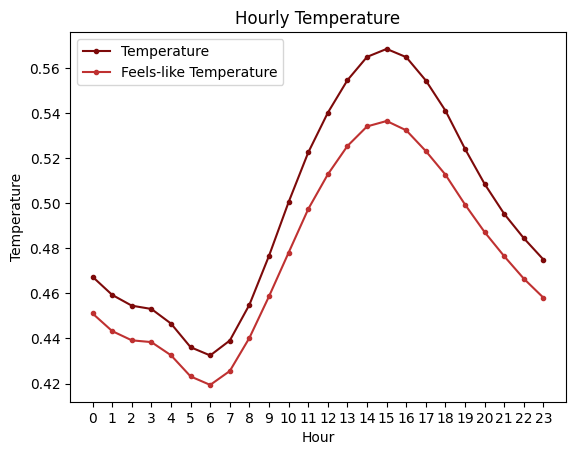

In [54]:
plt.plot(hourly_temperature['hr'], hourly_temperature['temp'], marker='.', label='Temperature', c = "#7D0A0A")
plt.plot(hourly_temperature['hr'], hourly_temperature['atemp'], marker='.', label='Feels-like Temperature', c = "#BF3131")
plt.xticks(hourly_temperature['hr'])
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Hourly Temperature')
plt.legend() 
plt.show()


From the line plot above, it's evident that between 16:00 - 17:00, the air temperature is notably high, potentially contributing to the spike in bike rentals during this hour. This suggests a plausible relationship between the surge in bike rentals during this time and the warm air temperature. Consequently, people are more likely to engage in outdoor activities during this period due to the comfortable warmth of the weather.

### Question 3:

- **What are the differences in rental patterns between weekdays, weekends, and holidays?**

In [63]:
rental_day = bike_hour.groupby(by = 'workingday').agg({
    'cnt':'sum'
}).reset_index().sort_values(by = 'cnt', ascending = False)

/var/folders/hz/gl8l7s9s3wd0bl_l0_y6s7h00000gn/T/ipykernel_5516/97187159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rental_day = bike_hour.groupby(by = 'workingday').agg({


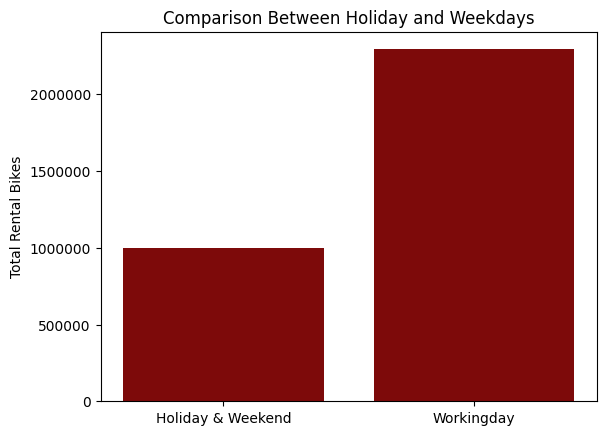

In [65]:
plt.bar(rental_day['workingday'], rental_day['cnt'], color = '#7D0A0A')
plt.xticks(rental_day['workingday'], ['Workingday', 'Holiday & Weekend'])
plt.ylabel('Total Rental Bikes')
plt.yscale('linear')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Comparison Between Holiday and Weekdays')
plt.show()

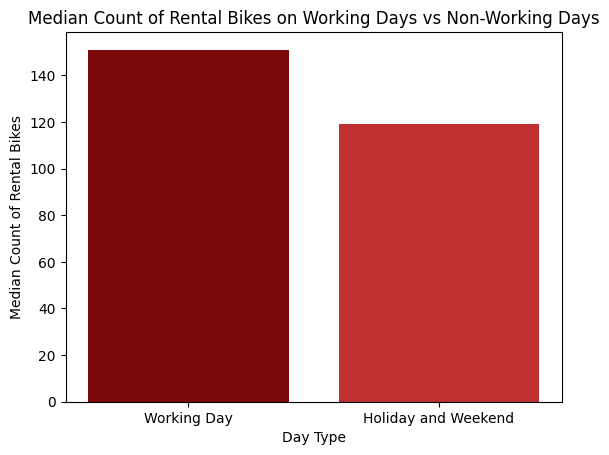

In [27]:
working_days = bike_hour[bike_hour['workingday'] == 1]['dteday']
working_day_data = bike_hour[bike_hour['dteday'].isin(working_days)]
non_working_day_data = bike_hour[~bike_hour['dteday'].isin(working_days)]
avg_rentals_working_day = working_day_data['cnt'].median()
avg_rentals_non_working_day = non_working_day_data['cnt'].median()
plt.bar(['Working Day', 'Holiday and Weekend'], [avg_rentals_working_day, avg_rentals_non_working_day], color=['#7D0A0A', '#BF3131'])
plt.xlabel('Day Type')
plt.ylabel('Median Count of Rental Bikes')
plt.title('Median Count of Rental Bikes on Working Days vs Non-Working Days')
plt.show()


The bar plot above illustrates the median count of rental bikes categorized into working days and non-working days. Surprisingly, it appears that the total count of rental bikes is higher on working days compared to non-working days.
This finding may initially seem counterintuitive, as one might expect more bike rentals on days when people have more leisure time, such as weekends or holidays. However, it's essential to consider the context of bike rentals. 
During working days, individuals might utilize rental bikes as a convenient mode of transportation for their daily commute to work or other obligations. This increased demand for bikes during weekdays could be attributed to factors such as commuting distances, traffic congestion, and the desire for a cost-effective and eco-friendly alternative to traditional transportation methods.
Conversely, on non-working days, people might have more flexibility in their schedules and may choose alternative modes of transportation or engage in leisure activities closer to home, resulting in a lower demand for rental bikes.
Therefore, despite the expectation of higher bike usage during leisure time, the data suggests that working days see a higher demand for rental bikes, likely due to their practicality for daily commuting needs.

**NOTE:**
I'm using the median instead of the mean for our analysis due to the skewed nature of our rental count (cnt) data.

## Conclusion

1. Conclusion for Question 1: The primary factor influencing the number of bike rentals is air temperature, as warmer temperatures tend to attract more cyclists.
  
2. Conclusion for Question 2: The peak rental hour, occurring at 5:00 PM, is likely influenced by the warm temperature during that time, contributing to increased bike usage.

3. Conclusion for Question 3: Contrary to expectations, working days exhibit a higher demand for rental bikes, possibly due to their practicality for daily commuting needs. This underscores the necessity of considering unique usage contexts when analyzing rental patterns.